In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('spambase.csv')

In [23]:
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


# preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [28]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [30]:
df.shape

(4601, 58)

In [34]:
correlation_matrix = df.corr()
important_features = correlation_matrix['spam'].abs().sort_values(ascending=False)
print("important features with target (spam):")
print(important_features)

important features with target (spam):
spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_hp                  0.256723
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_hpl                 0.232968
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_george              0.183404
word_freq_1999           

Text(0.5, 1.0, 'Correlation Matrix')

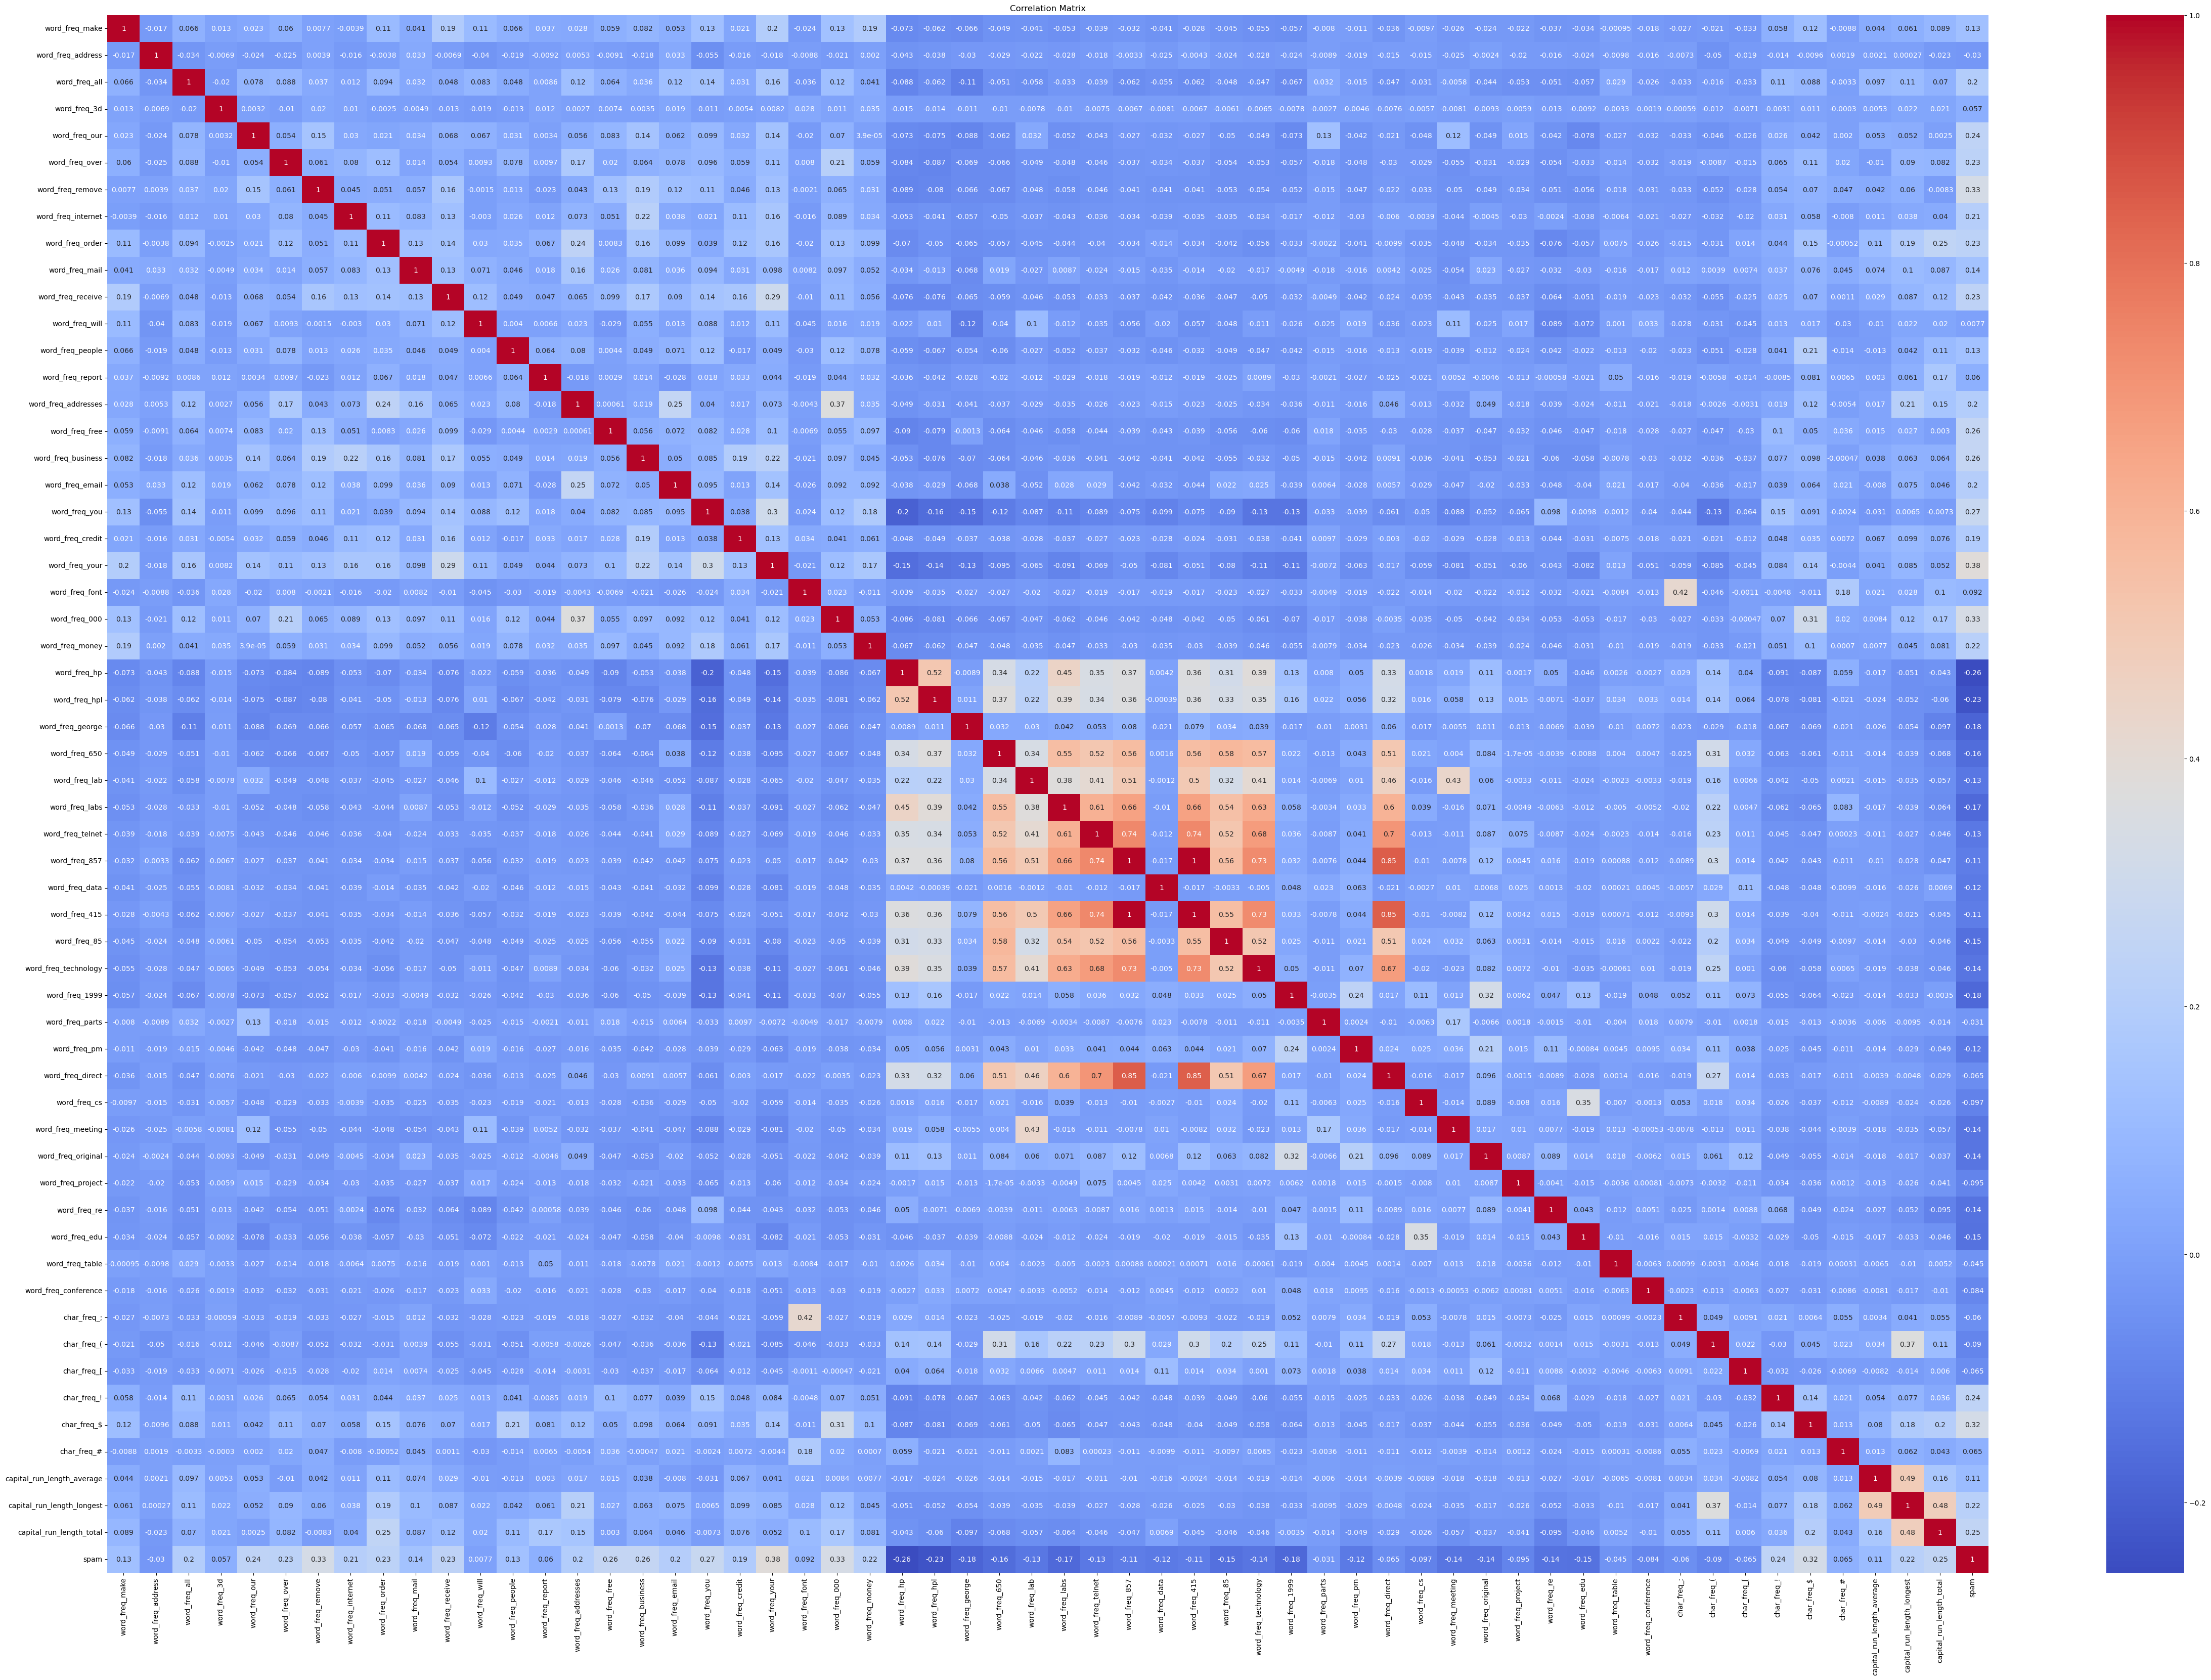

In [36]:
correlation_matrix=df.corr()
plt.figure(figsize=(60,40))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

# Feature extraction

In [38]:
most_important_features=important_features.index[1:33]
print(most_important_features)

Index(['word_freq_your', 'word_freq_000', 'word_freq_remove', 'char_freq_$',
       'word_freq_you', 'word_freq_free', 'word_freq_business', 'word_freq_hp',
       'capital_run_length_total', 'word_freq_our', 'char_freq_!',
       'word_freq_receive', 'word_freq_hpl', 'word_freq_over',
       'word_freq_order', 'word_freq_money', 'capital_run_length_longest',
       'word_freq_internet', 'word_freq_email', 'word_freq_all',
       'word_freq_addresses', 'word_freq_credit', 'word_freq_george',
       'word_freq_1999', 'word_freq_labs', 'word_freq_650', 'word_freq_85',
       'word_freq_edu', 'word_freq_re', 'word_freq_mail', 'word_freq_meeting',
       'word_freq_technology'],
      dtype='object')


In [41]:
X=df[most_important_features]
y=df['spam']

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
model_results = []

In [49]:
def apply_model(model,model_name):
    model.fit(x_train, y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    acc = accuracy_score(y_test, test_pred)
    error_rate = 1 - acc
    precision = precision_score(y_test, test_pred, zero_division=0)
    recall = recall_score(y_test, test_pred)

    model_results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Error Rate': error_rate,
        'Precision': precision,
        'Recall': recall
    })
    print('Train Classification Report: ')
    print(classification_report(y_train, train_pred))
    print('Test Classification Report: ')
    print(classification_report(y_test, test_pred))
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot = True, fmt = 'd')

# logistic Regression

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2257
           1       0.92      0.87      0.89      1423

    accuracy                           0.92      3680
   macro avg       0.92      0.91      0.91      3680
weighted avg       0.92      0.92      0.92      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       531
           1       0.93      0.85      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921



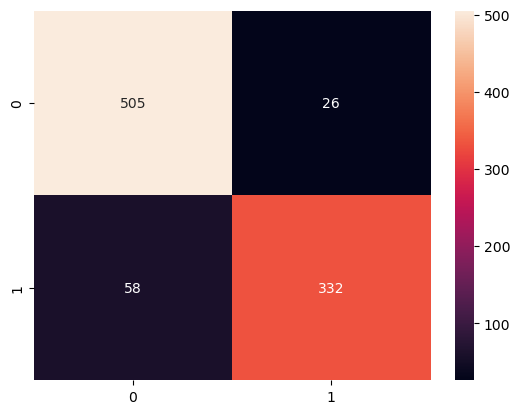

In [52]:
lr_model = LogisticRegression()
apply_model(lr_model,"Logistic Regression")

# SVM

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2257
           1       0.97      0.93      0.95      1423

    accuracy                           0.96      3680
   macro avg       0.96      0.96      0.96      3680
weighted avg       0.96      0.96      0.96      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.88      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



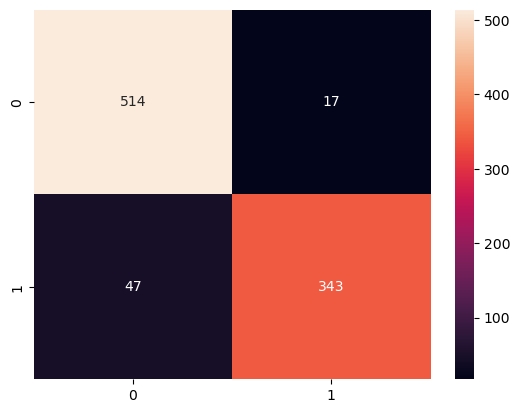

In [58]:
svm = SVC(C=10)
apply_model(svm,"SVM")

# KNN

Train Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2257
           1       1.00      1.00      1.00      1423

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       531
           1       0.88      0.87      0.88       390

    accuracy                           0.90       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



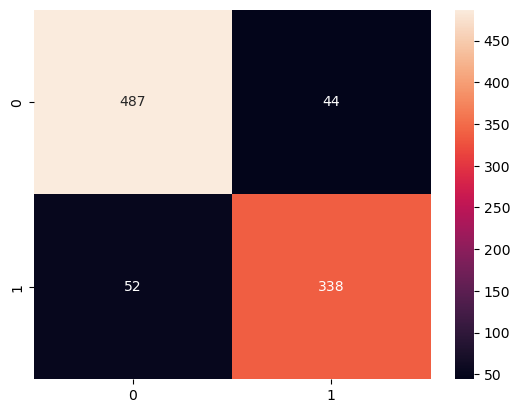

In [60]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
apply_model(knn_model,"KNN")

# Naive Bayes

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      2257
           1       0.66      0.95      0.78      1423

    accuracy                           0.79      3680
   macro avg       0.81      0.82      0.79      3680
weighted avg       0.84      0.79      0.79      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       531
           1       0.69      0.96      0.80       390

    accuracy                           0.80       921
   macro avg       0.82      0.82      0.80       921
weighted avg       0.84      0.80      0.80       921



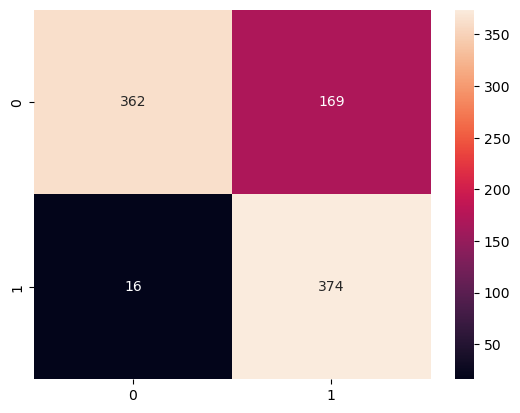

In [63]:
nb_model=GaussianNB()
apply_model(nb_model,"Naive Bayes")

# Decision Tree

Train Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2257
           1       1.00      1.00      1.00      1423

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       531
           1       0.91      0.87      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921



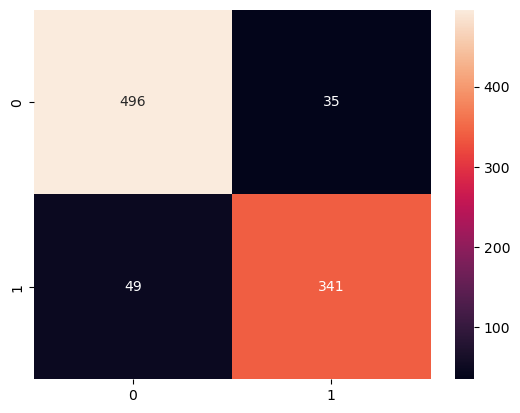

In [72]:
Decision_model=DecisionTreeClassifier()
apply_model(Decision_model,"Decision Tree")

# Random Forest

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2257
           1       1.00      0.98      0.99      1423

    accuracy                           0.99      3680
   macro avg       0.99      0.99      0.99      3680
weighted avg       0.99      0.99      0.99      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.97      0.92      0.94       390

    accuracy                           0.95       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.95      0.95      0.95       921



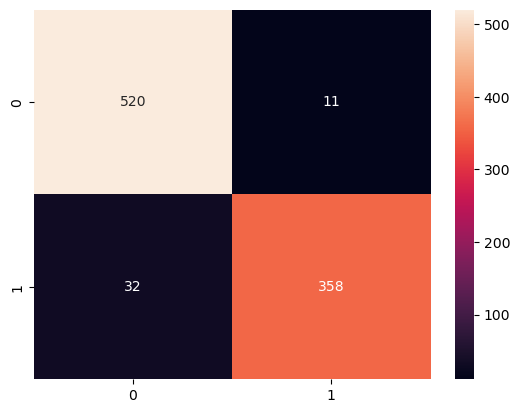

In [75]:
rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
apply_model(rf_model,"Random Forest")

# xgboost

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2257
           1       1.00      0.99      0.99      1423

    accuracy                           0.99      3680
   macro avg       0.99      0.99      0.99      3680
weighted avg       0.99      0.99      0.99      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       531
           1       0.96      0.94      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



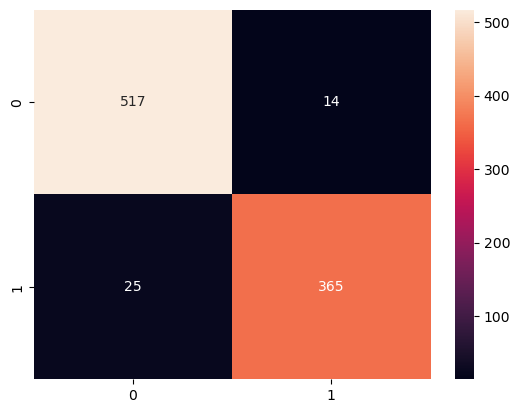

In [78]:
xgboost_model = XGBClassifier()
apply_model(xgboost_model,"xgboost")

# GradientBoosting

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2257
           1       0.96      0.94      0.95      1423

    accuracy                           0.96      3680
   macro avg       0.96      0.96      0.96      3680
weighted avg       0.96      0.96      0.96      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.96      0.91      0.93       390

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



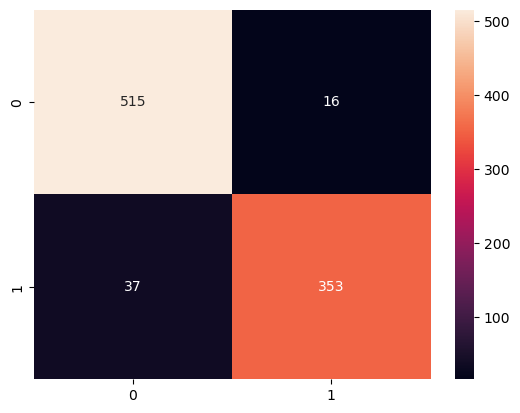

In [85]:
gbc= GradientBoostingClassifier()
apply_model(gbc,"GradiectBoosting")

# ANN

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2257
           1       0.97      0.93      0.95      1423

    accuracy                           0.96      3680
   macro avg       0.96      0.96      0.96      3680
weighted avg       0.96      0.96      0.96      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       531
           1       0.97      0.90      0.93       390

    accuracy                           0.94       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



<Axes: >

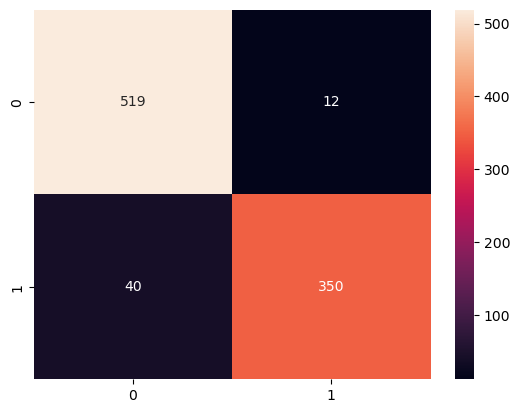

In [90]:
def create_ann_model():
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
ann_model = KerasClassifier(build_fn=create_ann_model, epochs=10, batch_size=32, verbose=0)

ann_model.fit(x_train, y_train)
train_pred = ann_model.predict(x_train)
test_pred = ann_model.predict(x_test)

test_pred = np.round(test_pred)

print('Train Classification Report: ')
print(classification_report(y_train, train_pred))
print('Test Classification Report: ')
print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot = True, fmt = 'd')


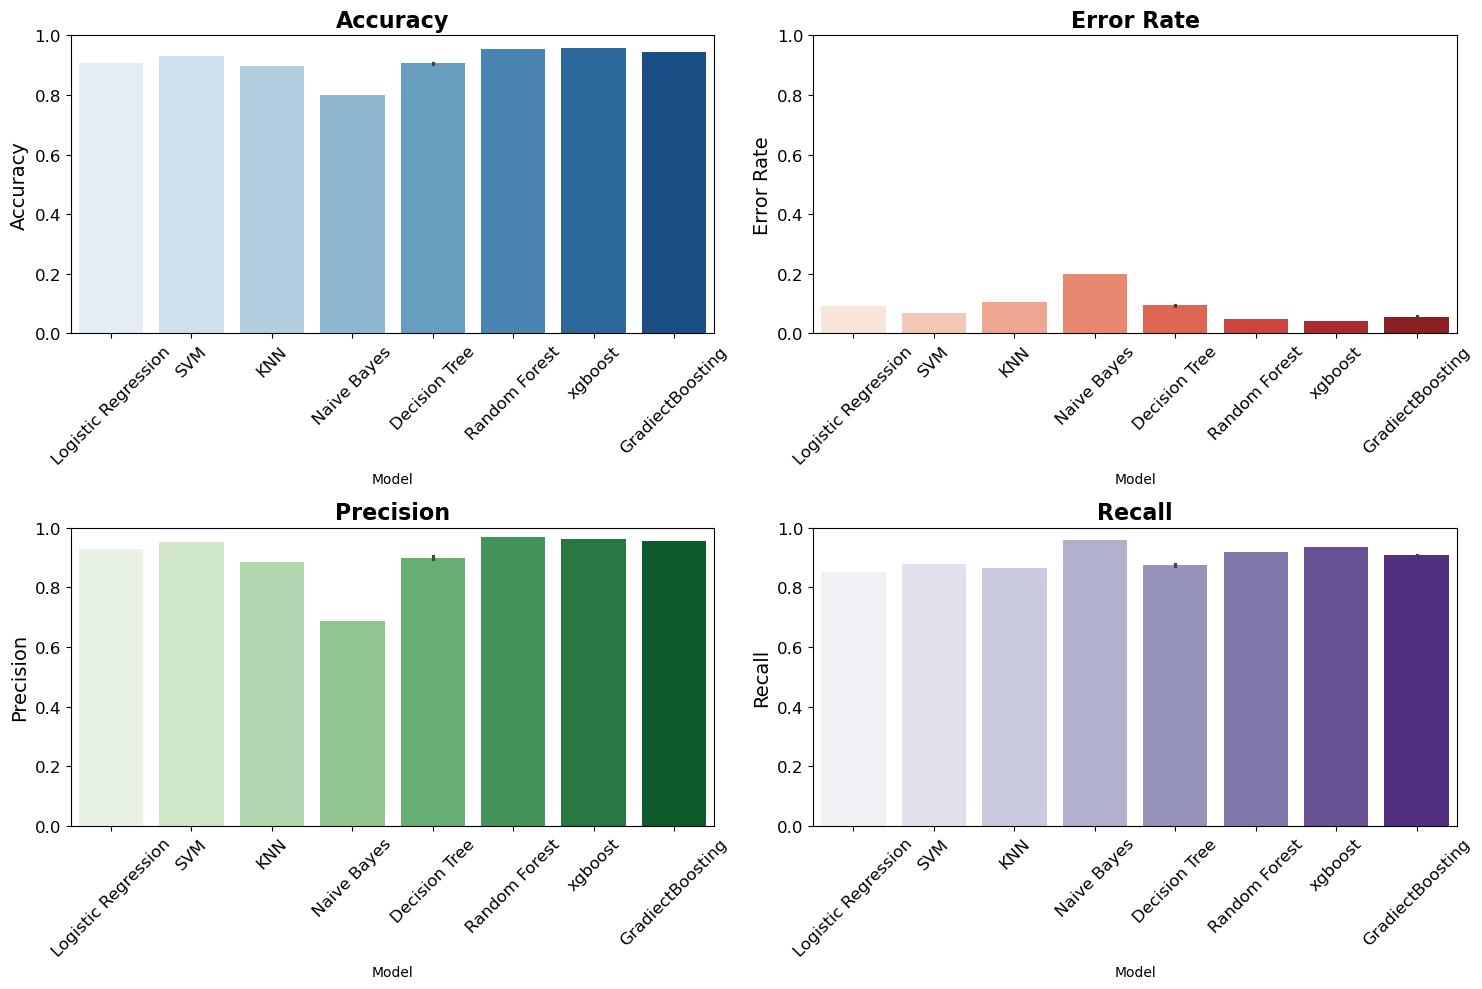

In [92]:
results_df = pd.DataFrame(model_results)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Blues')
plt.title('Accuracy', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=14)

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Error Rate', data=results_df, palette='Reds')
plt.title('Error Rate', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('Error Rate', fontsize=14)

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision', data=results_df, palette='Greens')
plt.title('Precision', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('Precision', fontsize=14)

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Recall', data=results_df, palette='Purples')
plt.title('Recall', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.ylabel('Recall', fontsize=14)

plt.tight_layout()
plt.show()


# Stacking With Cross Validation

In [93]:
models = [
     ('logreg', LogisticRegression(max_iter=5000, random_state=42)),
     ('svc', SVC(probability=True)),
     ('knn', KNeighborsClassifier()),
     ('dt', DecisionTreeClassifier(random_state=42)),
     ('nb', GaussianNB()),
     ('rf', RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)),
     ('xgboost', XGBClassifier()),
     ('ann', ann_model)
]

meta_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
stacking_clf = StackingClassifier(estimators=models, final_estimator=meta_model, cv=10)

In [95]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(stacking_clf, x_train, y_train, cv=cv)

print("Classification report on cross-validation (train data):")
print(classification_report(y_train, y_pred_cv))

Classification report on cross-validation (train data):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2257
           1       0.94      0.93      0.94      1423

    accuracy                           0.95      3680
   macro avg       0.95      0.95      0.95      3680
weighted avg       0.95      0.95      0.95      3680



Classification report on test data:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.93      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



<Axes: >

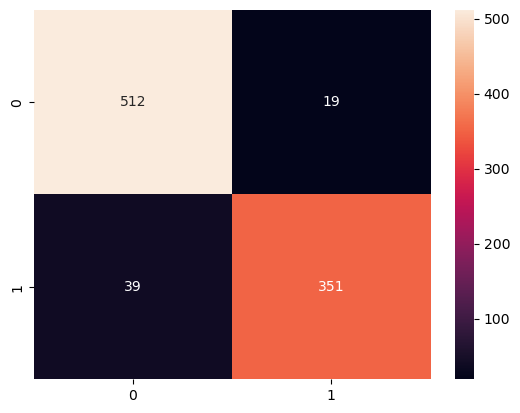

In [96]:
stacking_clf.fit(x_train, y_train)

y_pred_test = stacking_clf.predict(x_test)

print("Classification report on test data:") 
print(classification_report(y_test, y_pred_test))
sns.heatmap(cm, annot = True, fmt = 'd')


# Stacking

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2257
           1       1.00      0.99      0.99      1423

    accuracy                           0.99      3680
   macro avg       1.00      0.99      0.99      3680
weighted avg       0.99      0.99      0.99      3680

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.94      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



<Axes: >

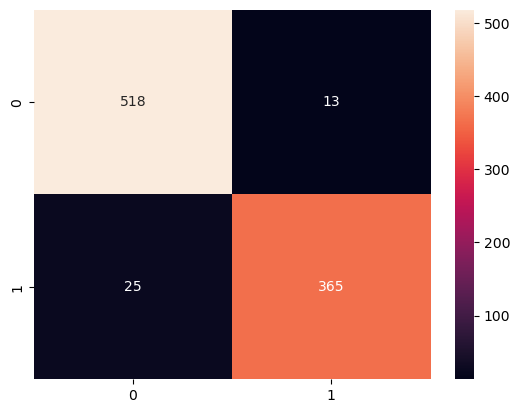

In [106]:
models = [
     ('logreg', LogisticRegression()),
     ('svc', SVC(probability=True)),
     ('knn', KNeighborsClassifier()),
     ('dt', DecisionTreeClassifier()),
     ('nb', GaussianNB()),
     ('rf', RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)),
     ('xgboost', XGBClassifier()),
     ('ann', ann_model)
]


meta_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
stacking_clf = StackingClassifier(estimators=models, final_estimator=meta_model, cv=10)

stacking_clf.fit(x_train, y_train)

train_pred =stacking_clf.predict(x_train)

test_pred = stacking_clf.predict(x_test)

print('Train Classification Report: ')
print(classification_report(y_train, train_pred))
print('Test Classification Report: ')
print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot = True, fmt = 'd')